In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../../Hi-C-embedding/GraphEmbedding")
sys.path.append("../../utilities/")
import data_utils
from ge.models import deepwalk, line, sdne
import networkx as nx
from sklearn.manifold import TSNE

In [ ]:
SC_annot[SC_annot['chr_name']=='chr1'].groupby('label').size()

In [3]:
SC_annot = data_utils.read_annot_file('../../data/GM12878/annotations/GSE63525_GM12878_subcompartments.bed', 0, 100000,0)
SC_annot = data_utils.melt_annotation(SC_annot)
def make_embedding_df(embeddings):
    embeddings = data_utils.make_embedding_df(embeddings,"../../data",'GM12878',100000)
    tsne_comps = TSNE(n_components=2,init='random').fit_transform(embeddings.iloc[:,2:])
    embeddings['tsne1'] = tsne_comps[:,0]
    embeddings['tsne2'] = tsne_comps[:,1]
    embeddings = pd.merge(embeddings, SC_annot, on = ['pos','chr_name'], how = 'inner')
    return embeddings

In [9]:
bi_G = {}
for n in [5000,10000,20000,40000]:
    contact_list = data_utils.create_contact_list("../../data", 'GM12878', 'chr21', 'chr21', 100000, 'oe')
    contact_list = contact_list.nlargest(n, 'weight')
    bi_contact_list = data_utils.bi_dir(contact_list)
    bi_G[n] = nx.from_pandas_edgelist(bi_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())

In [11]:
dim = 64
line_1st_embeddings = {}
for n in [5000,10000,20000,40000]:
    line_1st_model = line.LINE(bi_G[n],embedding_size=dim,order='first') #init model,order can be ['first','second','all']
    line_1st_model.train(batch_size=1024,epochs=15,verbose=2)# train model
    line_1st_embeddings[n] = line_1st_model.get_embeddings()# get embedding vectors
    line_1st_embeddings[n] = make_embedding_df(line_1st_embeddings[n])

Epoch 1/15
0s - loss: 12.5076
Epoch 2/15
0s - loss: 10.1571
Epoch 3/15
0s - loss: 8.1662
Epoch 4/15
0s - loss: 6.4888
Epoch 5/15
0s - loss: 5.1249
Epoch 6/15
0s - loss: 4.0485
Epoch 7/15
0s - loss: 3.0961
Epoch 8/15
0s - loss: 2.4310
Epoch 9/15
0s - loss: 1.9604
Epoch 10/15
0s - loss: 1.6157
Epoch 11/15
0s - loss: 1.3889
Epoch 12/15
0s - loss: 1.2396
Epoch 13/15
0s - loss: 1.1049
Epoch 14/15
0s - loss: 1.0197
Epoch 15/15
0s - loss: 0.9565
Epoch 1/15
0s - loss: 11.0135
Epoch 2/15
0s - loss: 7.1171
Epoch 3/15
0s - loss: 4.4492
Epoch 4/15
0s - loss: 2.6866
Epoch 5/15
0s - loss: 1.7487
Epoch 6/15
0s - loss: 1.2962
Epoch 7/15
0s - loss: 1.0517
Epoch 8/15
0s - loss: 0.9280
Epoch 9/15
0s - loss: 0.8548
Epoch 10/15
0s - loss: 0.8087
Epoch 11/15
0s - loss: 0.7803
Epoch 12/15
0s - loss: 0.7596
Epoch 13/15
0s - loss: 0.7494
Epoch 14/15
0s - loss: 0.7395
Epoch 15/15
0s - loss: 0.7330
Epoch 1/15
0s - loss: 8.9541
Epoch 2/15
0s - loss: 3.6124
Epoch 3/15
0s - loss: 1.5828
Epoch 4/15
0s - loss: 1.0227

In [12]:
dim = 64
line_2nd_embeddings = {}
for n in [5000,10000,20000,40000]:
    line_2nd_model = line.LINE(bi_G[n],embedding_size=dim,order='second') #init model,order can be ['first','second','all']
    line_2nd_model.train(batch_size=1024,epochs=15,verbose=2)# train model
    line_2nd_embeddings[n] = line_2nd_model.get_embeddings()# get embedding vectors
    line_2nd_embeddings[n] = make_embedding_df(line_2nd_embeddings[n])

Epoch 1/15
0s - loss: 12.1692
Epoch 2/15
0s - loss: 9.9774
Epoch 3/15
0s - loss: 8.1063
Epoch 4/15
0s - loss: 6.5216
Epoch 5/15
0s - loss: 5.1955
Epoch 6/15
0s - loss: 4.1920
Epoch 7/15
0s - loss: 3.2358
Epoch 8/15
0s - loss: 2.5666
Epoch 9/15
0s - loss: 2.0715
Epoch 10/15
0s - loss: 1.7156
Epoch 11/15
0s - loss: 1.4658
Epoch 12/15
0s - loss: 1.2975
Epoch 13/15
0s - loss: 1.1507
Epoch 14/15
0s - loss: 1.0489
Epoch 15/15
0s - loss: 0.9789
Epoch 1/15
0s - loss: 11.0484
Epoch 2/15
0s - loss: 7.3533
Epoch 3/15
0s - loss: 4.7615
Epoch 4/15
0s - loss: 2.9673
Epoch 5/15
0s - loss: 1.9491
Epoch 6/15
0s - loss: 1.4183
Epoch 7/15
0s - loss: 1.1211
Epoch 8/15
0s - loss: 0.9636
Epoch 9/15
0s - loss: 0.8683
Epoch 10/15
0s - loss: 0.8003
Epoch 11/15
0s - loss: 0.7536
Epoch 12/15
0s - loss: 0.7137
Epoch 13/15
0s - loss: 0.6779
Epoch 14/15
0s - loss: 0.6428
Epoch 15/15
0s - loss: 0.5998
Epoch 1/15
0s - loss: 9.1173
Epoch 2/15
0s - loss: 3.9680
Epoch 3/15
0s - loss: 1.8001
Epoch 4/15
0s - loss: 1.1062


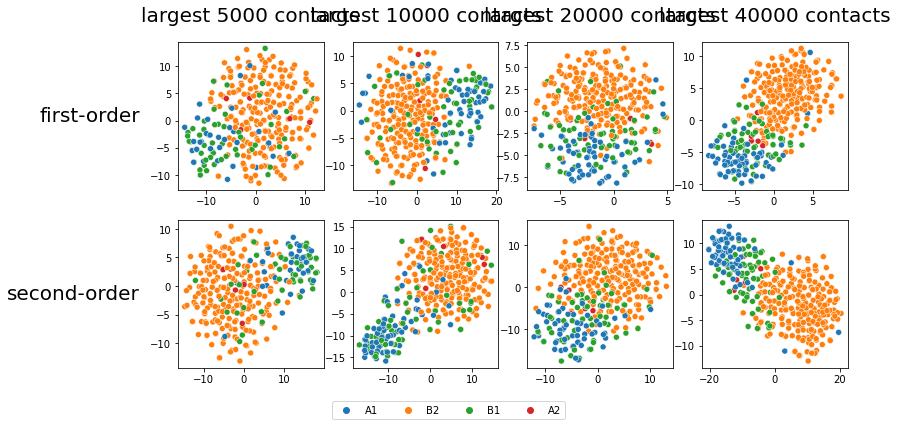

In [13]:
fig, axs = plt.subplots(2,4,figsize=(12,6))
for i,o in enumerate(['1st','2nd']):
    for j,n in enumerate([5000,10000,20000,40000]):
        data_name = 'line_' + o + '_embeddings'
        sns.scatterplot(data=eval(data_name)[n], x = 'tsne1', y = 'tsne2', hue = 'label', ax = axs[i,j])
        axs[i,j].get_legend().remove()
        axs[i,j].set(xlabel = None, ylabel = None)
        
pad = 2 # in points

for ax, col in zip(axs[0], ["largest " + str(n) + " contacts" for n in [5000,10000,20000,40000]]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 10*pad),
                xycoords='axes fraction', textcoords='offset pixels',
                size=20, ha='center', va='baseline')

for ax, row in zip(axs[:,0], ['first-order', 'second-order']):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset pixels',
                size=20, ha='right', va='center')
    
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop={'size': 10})
#fig.savefig(os.path.join('figures', "line_chr21_dims.png"), 
#            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)

In [16]:
line_1st_embeddings[5000].groupby('label').size()

label
A1     35
A2      5
B1     51
B2    223
dtype: int64